In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
def load_data(data_dir):
    images = []
    labels = []
    for label, folder in enumerate(os.listdir(data_dir)):
        for image_name in os.listdir(os.path.join(data_dir, folder)):
            image_path = os.path.join(data_dir, folder, image_name)
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image = image.resize((50, 50))  # Resize image to 50x50 pixels
            image = np.array(image) / 255.0  # Normalize pixel values
            image = np.expand_dims(image, axis=-1)  # Add channel dimension
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

In [3]:
data_dir = 'Dataset'  # Path to your dataset folder
images, labels = load_data(data_dir)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [1]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

NameError: name 'Sequential' is not defined

In [25]:

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
729/729 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8811 - loss: 0.3596 - val_accuracy: 0.6670 - val_loss: 1.4323
Epoch 2/5
729/729 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.8981 - loss: 0.3107 - val_accuracy: 0.6377 - val_loss: 1.5767
Epoch 3/5
729/729 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9000 - loss: 0.2942 - val_accuracy: 0.6701 - val_loss: 1.4766
Epoch 4/5
729/729 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9097 - loss: 0.2672 - val_accuracy: 0.6663 - val_loss: 1.6415
Epoch 5/5
729/729 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.9128 - loss: 0.2571 - val_accuracy: 0.6624 - val_loss: 1.6291


In [19]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=(50,50,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.015))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.0332 - loss: 3.9072 - val_accuracy: 0.0925 - val_loss: 3.6446
Epoch 2/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.1187 - loss: 3.5240 - val_accuracy: 0.1436 - val_loss: 3.3844
Epoch 3/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.1929 - loss: 3.2005 - val_accuracy: 0.2045 - val_loss: 3.1576
Epoch 4/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2533 - loss: 2.9514 - val_accuracy: 0.2388 - val_loss: 3.0059
Epoch 5/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.2864 - loss: 2.7852 - val_accuracy: 0.2664 - val_loss: 2.9395
Epoch 6/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.3124 - loss: 2.6745 - val_accuracy: 0.2621 - val_loss: 2.8991
Epoch 7/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.3375 - loss: 2.5717 - val_accuracy: 0.2723 - val_loss: 2.8888
Epoch 8/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.3596 - loss: 2.4828 - 

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes=51
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.summary()

c:\Users\D.K.V.REDDY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 51)             │         6,579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 657,587 (2.51 MB)

 Trainable params: 657,139 (2.51 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.0280 - loss: 4.1327 - val_accuracy: 0.0503 - val_loss: 3.8239
Epoch 2/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - accuracy: 0.0437 - loss: 3.8160 - val_accuracy: 0.0374 - val_loss: 3.8424
Epoch 3/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 47s 64ms/step - accuracy: 0.0856 - loss: 3.5006 - val_accuracy: 0.0539 - val_loss: 3.7304
Epoch 4/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - accuracy: 0.1347 - loss: 3.1656 - val_accuracy: 0.0472 - val_loss: 6.0016
Epoch 5/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 49s 68ms/step - accuracy: 0.1947 - loss: 2.8285 - val_accuracy: 0.0410 - val_loss: 13.6269
Epoch 6/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.2618 - loss: 2.5029 - val_accuracy: 0.0748 - val_loss: 3.6764
Epoch 7/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 56s 77ms/step - accuracy: 0.3106 - loss: 2.2315 - val_accuracy: 0.1436 - val_loss: 3.4482
Epoch 8/30
729/729 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.3753 - loss: 2.0342 -

KeyboardInterrupt: 

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6672 - loss: 1.6389
Test Accuracy: 0.6623777747154236


In [29]:
# Make predictions on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Initialize dictionaries to store counts of correct and wrong predictions for each label
correct_counts = {label: 0 for label in range(num_classes)}
wrong_counts = {label: 0 for label in range(num_classes)}

# Iterate through the test data and count correct and wrong predictions for each label
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_label_index = np.argmax(true_label)
    if true_label_index == predicted_label:
        correct_counts[true_label_index] += 1
    else:
        wrong_counts[true_label_index] += 1

# Print the counts for each label
for label in range(num_classes):
    print(f"Label {label}: Correct predictions = {correct_counts[label]}, Wrong predictions = {wrong_counts[label]}")



183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Label 0: Correct predictions = 74, Wrong predictions = 34
Label 1: Correct predictions = 143, Wrong predictions = 32
Label 2: Correct predictions = 29, Wrong predictions = 62
Label 3: Correct predictions = 58, Wrong predictions = 60
Label 4: Correct predictions = 74, Wrong predictions = 42
Label 5: Correct predictions = 90, Wrong predictions = 42
Label 6: Correct predictions = 62, Wrong predictions = 55
Label 7: Correct predictions = 70, Wrong predictions = 45
Label 8: Correct predictions = 78, Wrong predictions = 46
Label 9: Correct predictions = 79, Wrong predictions = 43
Label 10: Correct predictions = 87, Wrong predictions = 50
Label 11: Correct predictions = 44, Wrong predictions = 61
Label 12: Correct predictions = 82, Wrong predictions = 43
Label 13: Correct predictions = 110, Wrong predictions = 27
Label 14: Correct predictions = 76, Wrong predictions = 64
Label 15: Correct predictions = 96, Wrong predictions = 31
Label 16: Correct pred

In [30]:
model.save('handwritten_character_model.h5')

In [62]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model1 = load_model('handwritten_character_model.h5')

# Function to preprocess a single image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((50, 50))  # Resize image to 50x50 pixels
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

# Path to the individual image you want to predict
image_path = 'images/test/a/A_0_1352.jpeg'

# Preprocess the image
image = preprocess_image(image_path)

# Make predictions
predictions = model1.predict(np.array([image]))
predicted_label = np.argmax(predictions)

# Map predicted label to folder name
data_dir = 'Dataset'  # Path to your dataset folder
folder_names = os.listdir(data_dir)
predicted_class = folder_names[predicted_label]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class: a


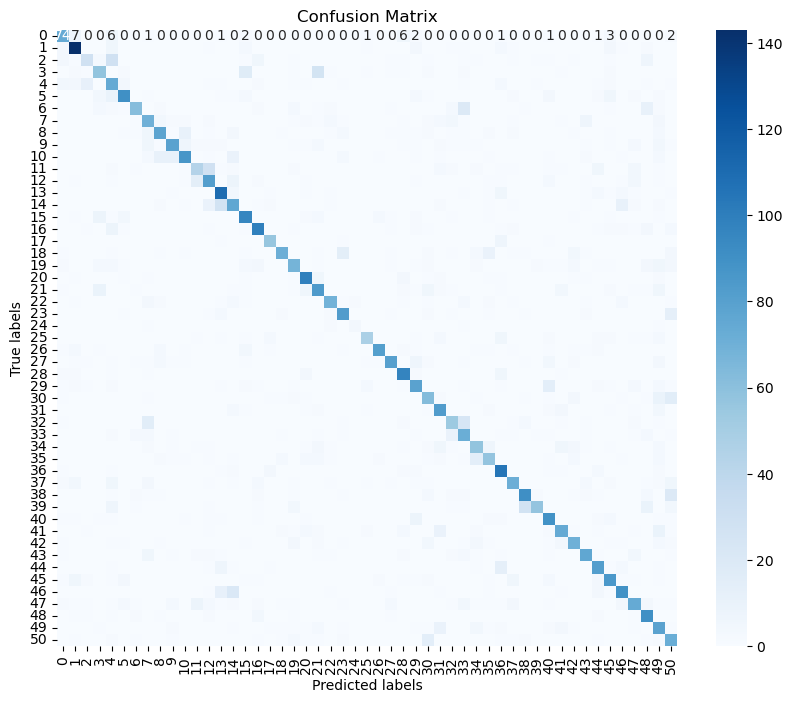

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
